#1. 신경망 복습

#1.1 수학과 파이썬 복습
***

## 1.1.1 벡터와 행렬
### 벡터와 행렬


*   벡터 : 크기와 방향을 가징 양
*   행렬 : 숫자가 2차원 형태로 늘어선 것

$$\begin{pmatrix}1\\2\\3\\ \end{pmatrix} \quad \begin{pmatrix}1&2\\3&4\\5&6\\ \end{pmatrix}$$

</br>

ex) 벡터와 행렬의 표현





In [1]:
import numpy as np

x = np.array([1,2,3])
print(x)
print("x.shape : ", x.shape)
print("x.dim : ", x.ndim)

print("")

w = np.array([[1,2,3],[4,5,6]])
print(w)
print("w.shape : ", w.shape)
print("w.dim : ", w.ndim)

[1 2 3]
x.shape :  (3,)
x.dim :  1

[[1 2 3]
 [4 5 6]]
w.shape :  (2, 3)
w.dim :  2


## 1.1.2. 행렬의 연소별 연산


In [2]:
w = np.array([[1,2,3],[4,5,6]])
x = np.array([[0,1,2],[3,4,5]])

print('w = \n',w)
print('x = \n',x)
print()
print('w+x = ')
print(w+x)
print('w*x = ')
print(w*x)

w = 
 [[1 2 3]
 [4 5 6]]
x = 
 [[0 1 2]
 [3 4 5]]

w+x = 
[[ 1  3  5]
 [ 7  9 11]]
w*x = 
[[ 0  2  6]
 [12 20 30]]


## 1.1.3 브로드캐스트


In [3]:
a = np.array([[1,2],[3,4]])
print(a *10)

a = np.array([[1,2],[3,4]])
b = np.array([10,20])
print(a*b)

[[10 20]
 [30 40]]
[[10 40]
 [30 80]]


## 1.1.4 벡터의 내적과 행렬의 곱

In [4]:
# 벡터의 내적
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

np.dot(a, b)

32

In [5]:
# 행렬의 곱
A = np.array([[1, 2], 
              [3, 4]])
B = np.array([[5, 6], 
              [7, 8]])

np.matmul(A, B)

array([[19, 22],
       [43, 50]])

#1.2 신경망의 추론

## 신경망 추론의 계산

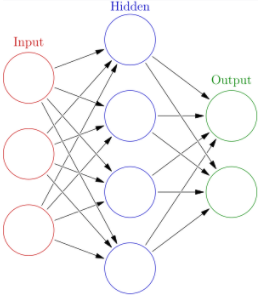
* h = 은닉층의 뉴런
* x = 인풋값
* w = 가중치
* b = 편향(bias)


* 참고(DNN, CNN, RNN)



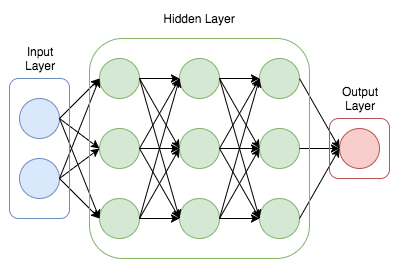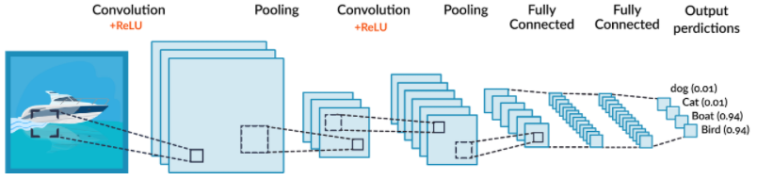

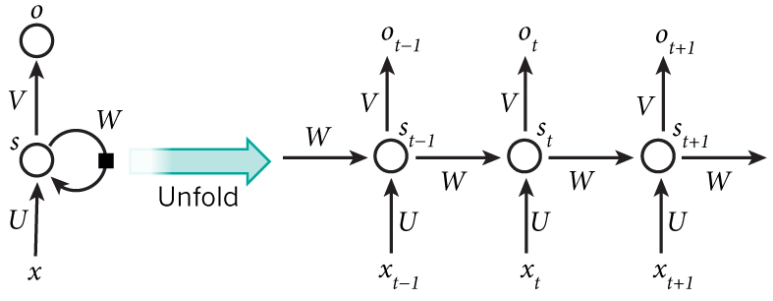

* h1 = xw + b

In [6]:
# Input -> hidden
W1 = np.random.randn(2, 4)  # 가중치
b1 = np.random.randn(4) # 편향
x = np.random.randn(1, 2) # 입력층(뉴런 1개)
h = np.matmul(x, W1) + b1
print(h) # 은닉층

[[ 2.03197364  0.34989943  1.9791691  -0.85876886]]


In [7]:
# Input -> hidden (미니배치)
W1 = np.random.randn(2, 4)  # 가중치
b1 = np.random.randn(4) # 편향
x = np.random.randn(10, 2) # 입력층(뉴런 10개)
h = np.matmul(x, W1) + b1
print(h) # 은닉층

[[-0.4752127   1.24954655 -2.10460977  0.83749985]
 [-0.62924818  2.56338236 -1.33107332 -0.61408014]
 [ 0.59031705  1.55638424  2.24877406 -0.39145163]
 [-0.37851273  2.29559454 -0.6578312  -0.49542958]
 [ 0.11953288  3.1878807   2.1505097  -1.96817337]
 [-0.90531682  2.20097537 -2.75120847  0.04369622]
 [ 0.63107519 -2.17835207 -1.45441891  4.0556755 ]
 [ 0.53289667 -0.09600643  0.3245061   1.63708956]
 [ 0.70884718  0.14836469  1.24345381  1.20179389]
 [-1.33802398  3.76271167 -2.77728402 -1.4801075 ]]


- 비선형 변환 : 시그모이드 함수(sigmoid function)

$$
\sigma(x) = \frac{1}{1 + \exp{(-x)}}
$$

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

a = sigmoid(h)  # 활성화(activation)

a

array([[0.38338321, 0.77722136, 0.10864958, 0.69793839],
       [0.34768103, 0.92846743, 0.20898188, 0.35112903],
       [0.64343789, 0.8258339 , 0.90454474, 0.4033679 ],
       [0.40648566, 0.90851152, 0.34122697, 0.37861533],
       [0.52984769, 0.96037565, 0.8957164 , 0.12258522],
       [0.28795912, 0.90033707, 0.06001844, 0.51092232],
       [0.65273322, 0.10171139, 0.18932242, 0.98297123],
       [0.63015846, 0.47601681, 0.58042203, 0.83713852],
       [0.67014638, 0.53702328, 0.77616463, 0.76884375],
       [0.2078352 , 0.97730628, 0.05856412, 0.18541118]])

### 1.2.2 계층으로 클래스화 및 순전파 구현

* 완전연결계층에 의한 변환 = Affine 계층
* 시그모이드 함수를 이용한 활성화 함수 계층 = Sigmoid 계층

* (각 계층은 forward 매서드를 통해 순전파 기능을 수행)

In [9]:
import numpy as np

# 시그모이드(Sigmoid) 레이어 구현
class Sigmoid:
    '''Sigmoid Layer class
    
    Sigmoid layer에는 학습하는 params가 따로 없으므로 
    인스턴스 변수인 params는 빈 리스트로 초기화
    
    '''
    def __init__(self):
        self.params = []
    
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

In [10]:
# 완전연결계층(Affine) 구현
class Affine:
    '''FC layer'''
    def __init__(self, W, b):
        """
        Args: 
            W(ndarray): 가중치(weight)
            b(ndarray): 편향(bias)
        """
        self.params = [W, b]
        
    def forward(self, x):
        """순전파(forward propagation) 메서드
        Args:
            x(ndarray): 입력으로 들어오는 값
        Returns:
            out(ndarray): Wx + b
        """
        W, b = self.params
        out = np.matmul(x, W) + b
        return out

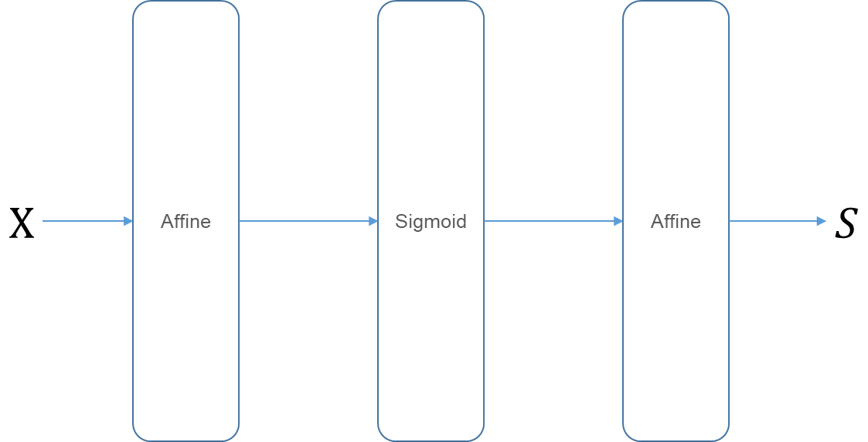

In [11]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        # input -> hidden
        W1 = np.random.randn(I, H)  
        b1 = np.random.randn(H)
         # hidden -> output
        W2 = np.random.randn(H, O) 
        b2 = np.random.randn(O)
        
        # 레이어 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        
        # 모든 가중치를 리스트에 모은다.
        self.parmas = [layer.params for layer in self.layers]
        # self.params = []
        # for layer in self.layers:
        #     self.params += layer.params
        
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

# 1.3 신경망의 학습

## 1.3.1 손실함수

* 손실함수란? 실제값과 예측값의 차이를 수치로 나타내는 함수
* 신경망의 성능을 나타내는 척도로 사용됨
* ex) **교차 엔트로피 오차**, 평균 제곱 오차 등

* ※Softmax 함수
- Softmax 함수의 식은 다음과 같다. 
    - class가 $n$개 일 때, $k$ 번째 클래스의 확률 $y_k$ 를 구하는 식

$$
y_{k} = \frac{\exp{(s_k)}}{\sum_{i=1}^{n}{\exp{(S_i)}}}
$$

In [12]:
def softmax(x):
    if x.ndim == 2:
        # overflow를 막기 위해 입력값 중 
        # 최대값을 빼준다. >> 밑러닝-1, 3.5.2 참고
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x

- Cross Entropy 식은 다음과 같다.
     - $t_k$는 $k$번째 클래스에 해당하는 정답 레이블
     - $\log$는 밑을 $e$로 하는 로그(자연로그)
     - 정답 레이블 $t_k$는 원-핫 벡터(0,1)이기 때문에, 실질적으로 $1$에만 해당하는 인덱스만 계산 된다.

$$
\begin{align*}
L &= -\sum_{k}{\left[ t_k \log{y_k} + (1-t_k) \log{(1-y_k)}\right]} \\ 
&= - {\frac{1}{N}\sum_{n}}\sum_{k}{t_k \log{y_k}}
\end{align*}
$$

In [13]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    # 정답 데이터가 원핫 벡터일 경우 정답 레이블 인덱스로 변환
    if t.size == y.size:
        t = t.argmax(axis=1)
    
    batch_size = y.shape[0]

    cross_entropy = np.log(y[np.arange(batch_size), t] + 1e-7)
    loss = -np.sum(cross_entropy) / batch_size
    
    return loss

- 위에서 제시한 Softmax 함수와 Cross Entropy를 하나의 계층으로 구현
     - 미니배치 학습을 고려하여 N개의 데이터에 대한 계산이 가능하도록 구현하면 다음과 같다.

$$
\begin{align*}
L 
&= - {\frac{1}{N}\sum_{n}}\sum_{k}{t_k \log{y_k}}
\end{align*}
$$

In [14]:
class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmax의 출력
        self.t = None  # 정답 레이블

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 정답 레이블이 원핫 벡터일 경우 정답의 인덱스로 변환
        # cross_entropy_error()에 이미 변환과정이 있기 때문에 생략 가능
        if self.t.size == self.y.size:
            self.t = self.t. argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx /= batch_size

        return dx

## 1.3.2 미분과 기울기

- 신경망의 학습 목표는 손실을 최소화하는 매개변수(가중치, 편향 등)를 찾는 것
- 이 과정에서 '미분'과 '기울기'가 사용됨
- 가령, $L$은 스칼라, $x$는 벡터인 함수가 있을 때,

$$
L = f(x)
$$

벡터의 각 원소에 대한 미분을 계산한 것이 **기울기**(gradient)이다.(x의 값이 변화할 때, y값은 얼마나 변하는가?)

$$
\frac{\partial L}{\partial \mathbf{x}} = \left[ \frac{\partial L}{\partial x_1}, \frac{\partial L}{\partial x_2}, \cdots, \frac{\partial L}{\partial x_n} \right]
$$

## 1.3.3 연쇄 법칙

* 합성함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.
* 합성곱 신경망은 여러 함수가 연결된 것으로 합성함수의 미분, 즉 연쇄 법칙이 성립

$$
t = x + y
$$

$$
z = t^2
$$

$$
\frac{\partial z}{\partial x} = \frac{\partial z}{\partial t} \frac{\partial t}{\partial x}
$$

$$
\frac{\partial z}{\partial t} = 2t
$$

$$
\frac{\partial t}{\partial x} = 1
$$

$$
\frac{\partial z}{\partial x} = \frac{\partial z}{\partial t} \frac{\partial t}{\partial x} = 2t \cdot 1 = 2(x + y)
$$

## 1.3.4 계산 그래프

**계산 그래프(computational graph)**는 계산 과정을 그래프로 나타낸 것이며, **노드**(node)와 **엣지**(edge)로 표현된다. 노드는 연산을 정의하며, 엣지는 데이터(값)가 흘러가는 방향을 나타낸다.

<br/>

* **덧셈 노드**

$
z = x + y
$

$
\frac{\partial z}{\partial x} = 1
$

$
\frac{\partial z}{\partial y} = 1
$

덧셈 노드의 역전파는 입력값을 그대로 흘려보낸다.
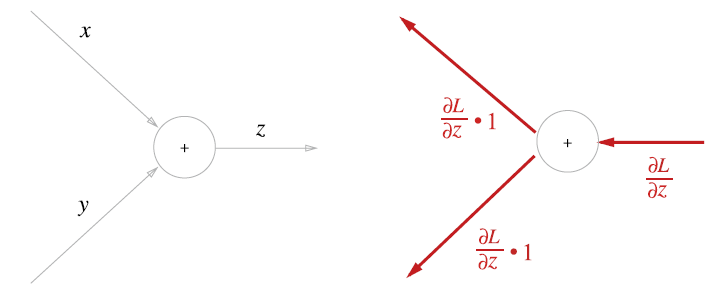

* **곱셈 노드**

$
z =xy
$

$
\frac{\partial z}{\partial x} = y 
$

$
\frac{\partial z}{\partial y} = x
$
곱셈 노드의 역전파는 순전파 시의 입력을 서로 바꾼 값을 곱한다.

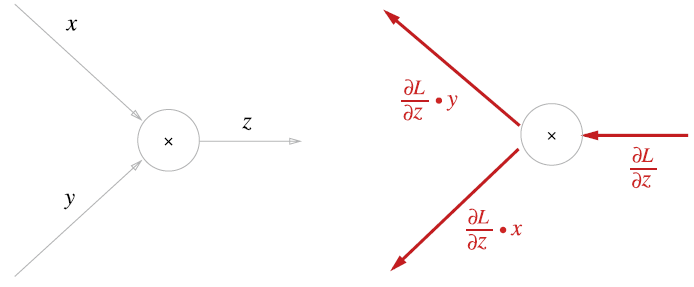

* **분기 노드**

분기 노드는 선이 두 개로 나뉘면서, 같은 값이 복제(복제 노드라고도 함)된다.<br> 분기노드의 역전파는 상류에서 온 기울기들의 '합'이 된다.


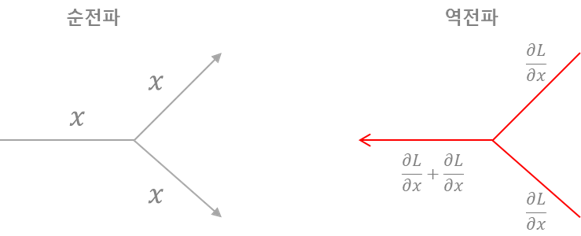

* **Repeat 노드**

분기 노드를 일반화 하면 $N$개로 분기(나누어 갈라짐) 되는데, <br>
이를 Repeat 노드라고 한다.

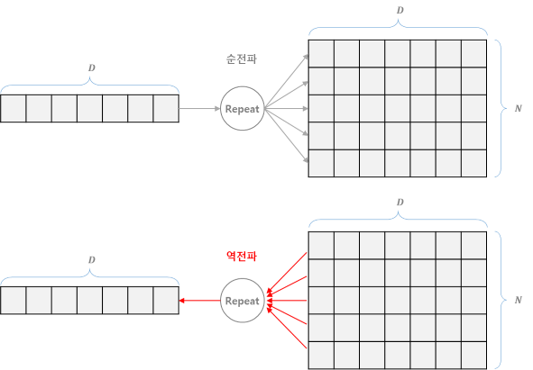

In [15]:
# Repeat 노드 예제
import numpy as np

x = np.random.randn(1, 8)  # 입력
# np.repeat()이 복제노드 역할을 함
y = np.repeat(x, 7, axis=0)  # 순전파
print(x)
print(y)

[[-0.1453175   0.55527606 -0.66106293 -1.77105568 -1.11811649 -0.46148735
   0.41482772  1.00679662]]
[[-0.1453175   0.55527606 -0.66106293 -1.77105568 -1.11811649 -0.46148735
   0.41482772  1.00679662]
 [-0.1453175   0.55527606 -0.66106293 -1.77105568 -1.11811649 -0.46148735
   0.41482772  1.00679662]
 [-0.1453175   0.55527606 -0.66106293 -1.77105568 -1.11811649 -0.46148735
   0.41482772  1.00679662]
 [-0.1453175   0.55527606 -0.66106293 -1.77105568 -1.11811649 -0.46148735
   0.41482772  1.00679662]
 [-0.1453175   0.55527606 -0.66106293 -1.77105568 -1.11811649 -0.46148735
   0.41482772  1.00679662]
 [-0.1453175   0.55527606 -0.66106293 -1.77105568 -1.11811649 -0.46148735
   0.41482772  1.00679662]
 [-0.1453175   0.55527606 -0.66106293 -1.77105568 -1.11811649 -0.46148735
   0.41482772  1.00679662]]


* **Sum 노드**

아래의 그림에서 확인할 수 있듯이, Sum 노드와 Repeat 노드는 서로 **'반대 관계'** 이다. 
- Sum 노드의 순전파가 Repeat 노드의 역전파이며,
- Sum 노드의 역전파가 Repeat 노드의 순전파가 된다.

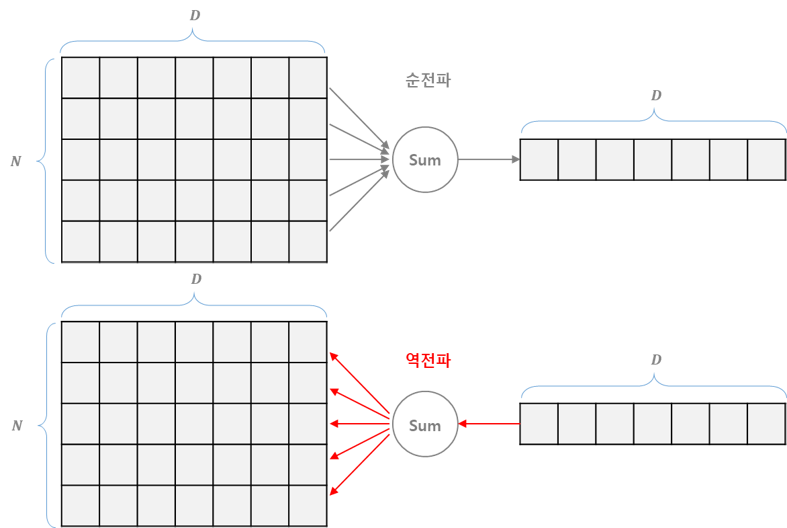

* **MatMul 노드**

행렬의 곱셈 Matrix Multiply의 약자로 `MatMul`을 사용한다.<br>
배치사이즈가 $N$이라고 할 때 MatMul 노드의 역전파는 다음과 같다.

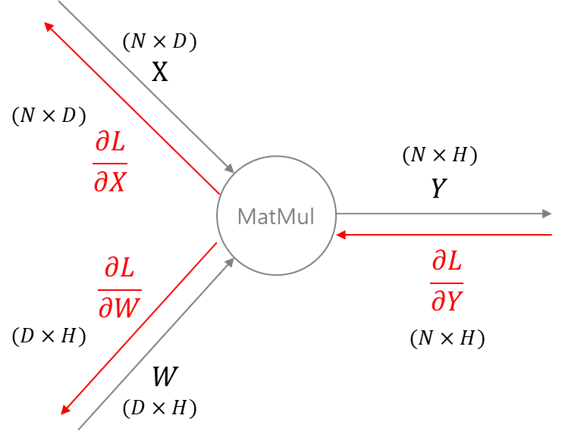

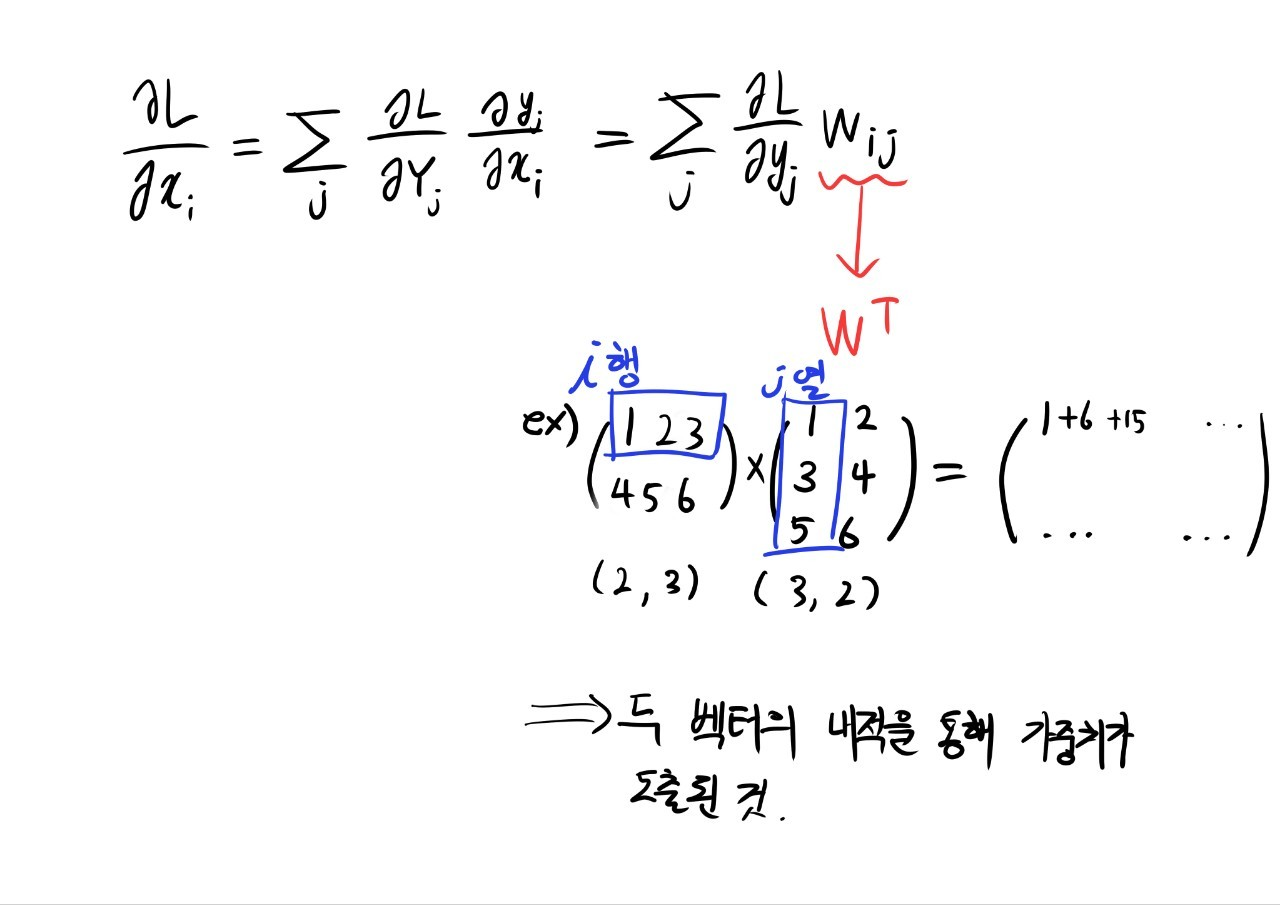

In [16]:
# MatMul 클래스 구현

class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
        
    def forward(self, x):
        W, = self.params
        out = np.matmul(x, W)
        self.x = x
        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW  # 깊은 복사
        return dx

* 깊은 복사 : 메모리 위치에 값이 복제됨
* 얕은 복사 : 메모리 위치에 복제되는 것이 아니라 복제되는 메모리 위치로 이동

## 1.3.5 기울기 도출과 역전파 구현

구현하고자 하는 계층 : Sigmoid계층 / Affine 계층 / Softmax with Loss계층

* Sigmoid 계층

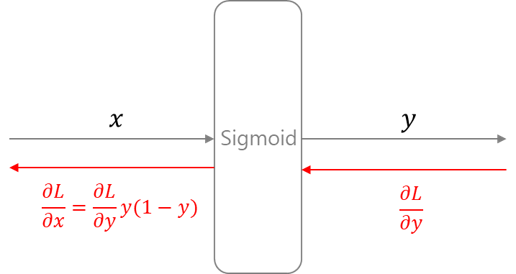

In [17]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

* Affine 계층

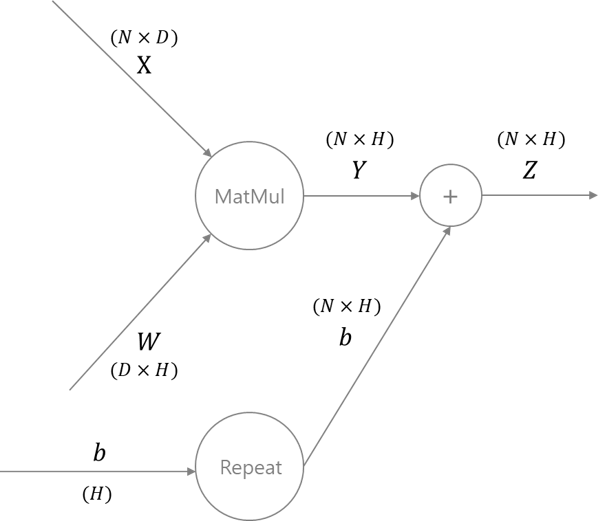

In [18]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
        
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        self.x = x
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis=0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

* Softmax with Loss 계층

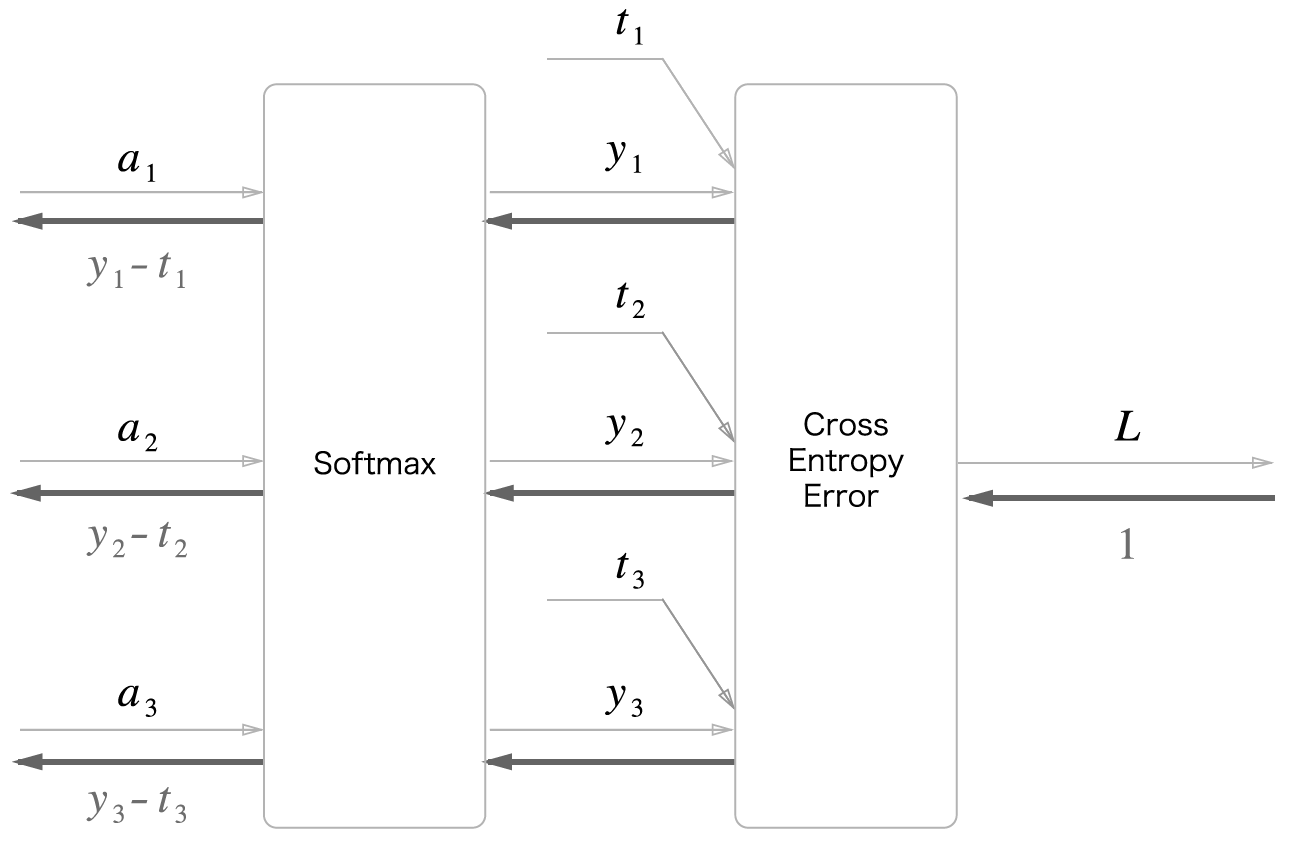

In [19]:
class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmax의 출력
        self.t = None  # 정답 레이블

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 정답 레이블이 원핫 벡터일 경우 정답의 인덱스로 변환
        if self.t.size == self.y.size:
            self.t = self.t. argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx /= batch_size

        return dx

## 1.3.6 가중치 갱신


신경망의 학습 순서는 다음과 같다.

- 1단계: 미니배치
    - 훈련 데이터 중 랜덤으로 다수의 데이터를 샘플링 한다.
    
    
- 2단계: 기울기 계산
    - 오차역전파법으로 각 가중치 매개변수에 대한 손실 함수의 기울기를 구한다.
    
    
- 3단계: 매개변수 갱신
    - 기울기를 사용하여 가중치 매개변수를 갱신한다.
    
    
- 4단계: 반복
    - 1 ~ 3단계를 필요한 만큼 반복한다.
    
<br/>
    
2단계에서 구한 기울기는 현재의 가중치 매개변수에서 손실을 가장 크게 하는 방향을 가리키기 때문에, 매개변수를 그 기울기와 반대 방향으로 갱신해야 한다. 이를 **경사 하강법**(Gradient Descent)이라 한다.

경사하강법 중 가장 단순한 방법인 **확률적 경사하강법**(SGD, Stochastic Gradient Descent)는 다음과 같다. $\eta$는 학습률(learning rate)를 나타낸다. (ex.0.01, 0.001)

$$
\mathbf{W} \leftarrow \mathbf{W} - \eta \frac{\partial L}{\partial \mathbf{W}}
$$

* Learnig rate decay 전략

learing rate를 고정값(constant value)을 사용하면 안좋을까?<br>
-> 학습률의 값을 고정할 경우, 도달하고자 하는 지점에서 진동이 발생할 가능성이 존재.

1. step decay -> 처음에는 크게, 갈수록 작게
2. exponential decay -> 감마를 e^-t로 지정하여 점차 학습률이 0으로 수렴하도록 하는 전략
3. Cosine decay -> 코사인 그래프와 같이 1에서 0으로 수렴하는 그래프의 가파른 정도를 활용하는 전략


In [20]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr  # learning rate

    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

# 1.4 신경망으로 문제를 풀다

### 1.4.1 스파이럴 데이터셋

* 300개의 데이터셋
* x는 2차원 데이터, t(정답 레이블)는 3차원 데이터
* t는 원핫 벡터

In [21]:
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt

from dataset import spiral

x, t = spiral.load_data()
print('x', x.shape)  # (300, 2)
print('t', t.shape)

x (300, 2)
t (300, 3)


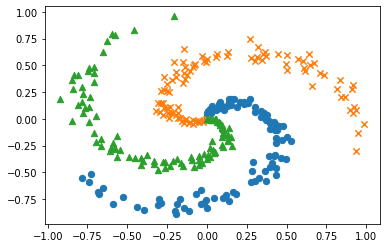

In [22]:
# 데이터점 플롯
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

### 1.4.2 신경망 구현


In [23]:
# ch01/two_layer_net.py
import sys
sys.path.append('..')
from common.np import *
from common.layers import Affine, Sigmoid, SoftmaxWithLoss


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치와 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        # 레이어 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

### 1.4.3 학습용 코드

1. 하이퍼파라미터 설정(에폭, 미니배치 크기, 은닉층의 뉴런 수, 학습률)
2. 스파이럴 데이터셋 로드 및 모델, 옵티마이저 생성
3. 데이터 셔플링
4. 에폭마다 기울기 및 매개변수 갱신
5. 에폭별 학습결과 출력


In [25]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm  # pip install tqdm
from common.optimizer import SGD
from dataset import spiral
from two_layer_net import TwoLayerNet

# 1. 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 2. 데이터 읽기, 모델과 옵티마이저 생성
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2,
                    hidden_size=hidden_size,
                    output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

    # 3. 데이터 셔플링
for epoch in tqdm(range(max_epoch)):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        # 기울기를 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        # 정기적으로 학습 경과 출력
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print(f'| 에폭 {epoch+1} | 반복{iters+1}/{max_iters} | 손실 {avg_loss:.2f}')
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

 16%|█▌        | 47/300 [00:00<00:00, 461.39it/s]

| 에폭 1 | 반복10/10 | 손실 1.13
| 에폭 2 | 반복10/10 | 손실 1.13
| 에폭 3 | 반복10/10 | 손실 1.12
| 에폭 4 | 반복10/10 | 손실 1.12
| 에폭 5 | 반복10/10 | 손실 1.11
| 에폭 6 | 반복10/10 | 손실 1.14
| 에폭 7 | 반복10/10 | 손실 1.16
| 에폭 8 | 반복10/10 | 손실 1.11
| 에폭 9 | 반복10/10 | 손실 1.12
| 에폭 10 | 반복10/10 | 손실 1.13
| 에폭 11 | 반복10/10 | 손실 1.12
| 에폭 12 | 반복10/10 | 손실 1.11
| 에폭 13 | 반복10/10 | 손실 1.09
| 에폭 14 | 반복10/10 | 손실 1.08
| 에폭 15 | 반복10/10 | 손실 1.04
| 에폭 16 | 반복10/10 | 손실 1.03
| 에폭 17 | 반복10/10 | 손실 0.96
| 에폭 18 | 반복10/10 | 손실 0.92
| 에폭 19 | 반복10/10 | 손실 0.92
| 에폭 20 | 반복10/10 | 손실 0.87
| 에폭 21 | 반복10/10 | 손실 0.85
| 에폭 22 | 반복10/10 | 손실 0.82
| 에폭 23 | 반복10/10 | 손실 0.79
| 에폭 24 | 반복10/10 | 손실 0.78
| 에폭 25 | 반복10/10 | 손실 0.82
| 에폭 26 | 반복10/10 | 손실 0.78
| 에폭 27 | 반복10/10 | 손실 0.76
| 에폭 28 | 반복10/10 | 손실 0.76
| 에폭 29 | 반복10/10 | 손실 0.78
| 에폭 30 | 반복10/10 | 손실 0.75
| 에폭 31 | 반복10/10 | 손실 0.78
| 에폭 32 | 반복10/10 | 손실 0.77
| 에폭 33 | 반복10/10 | 손실 0.77
| 에폭 34 | 반복10/10 | 손실 0.78
| 에폭 35 | 반복10/10 | 손실 0.75
| 에폭 36 | 반복10/10 | 손실 0.74
|

 46%|████▋     | 139/300 [00:00<00:00, 438.67it/s]

| 에폭 93 | 반복10/10 | 손실 0.54
| 에폭 94 | 반복10/10 | 손실 0.53
| 에폭 95 | 반복10/10 | 손실 0.53
| 에폭 96 | 반복10/10 | 손실 0.52
| 에폭 97 | 반복10/10 | 손실 0.51
| 에폭 98 | 반복10/10 | 손실 0.50
| 에폭 99 | 반복10/10 | 손실 0.48
| 에폭 100 | 반복10/10 | 손실 0.48
| 에폭 101 | 반복10/10 | 손실 0.46
| 에폭 102 | 반복10/10 | 손실 0.45
| 에폭 103 | 반복10/10 | 손실 0.45
| 에폭 104 | 반복10/10 | 손실 0.44
| 에폭 105 | 반복10/10 | 손실 0.44
| 에폭 106 | 반복10/10 | 손실 0.41
| 에폭 107 | 반복10/10 | 손실 0.40
| 에폭 108 | 반복10/10 | 손실 0.41
| 에폭 109 | 반복10/10 | 손실 0.40
| 에폭 110 | 반복10/10 | 손실 0.40
| 에폭 111 | 반복10/10 | 손실 0.38
| 에폭 112 | 반복10/10 | 손실 0.38
| 에폭 113 | 반복10/10 | 손실 0.36
| 에폭 114 | 반복10/10 | 손실 0.37
| 에폭 115 | 반복10/10 | 손실 0.35
| 에폭 116 | 반복10/10 | 손실 0.34
| 에폭 117 | 반복10/10 | 손실 0.34
| 에폭 118 | 반복10/10 | 손실 0.34
| 에폭 119 | 반복10/10 | 손실 0.33
| 에폭 120 | 반복10/10 | 손실 0.34
| 에폭 121 | 반복10/10 | 손실 0.32
| 에폭 122 | 반복10/10 | 손실 0.32
| 에폭 123 | 반복10/10 | 손실 0.31
| 에폭 124 | 반복10/10 | 손실 0.31
| 에폭 125 | 반복10/10 | 손실 0.30
| 에폭 126 | 반복10/10 | 손실 0.30
| 에폭 127 | 반복10/10 | 

 75%|███████▌  | 226/300 [00:00<00:00, 411.78it/s]

| 에폭 177 | 반복10/10 | 손실 0.18
| 에폭 178 | 반복10/10 | 손실 0.18
| 에폭 179 | 반복10/10 | 손실 0.17
| 에폭 180 | 반복10/10 | 손실 0.17
| 에폭 181 | 반복10/10 | 손실 0.18
| 에폭 182 | 반복10/10 | 손실 0.17
| 에폭 183 | 반복10/10 | 손실 0.18
| 에폭 184 | 반복10/10 | 손실 0.17
| 에폭 185 | 반복10/10 | 손실 0.17
| 에폭 186 | 반복10/10 | 손실 0.18
| 에폭 187 | 반복10/10 | 손실 0.17
| 에폭 188 | 반복10/10 | 손실 0.17
| 에폭 189 | 반복10/10 | 손실 0.17
| 에폭 190 | 반복10/10 | 손실 0.17
| 에폭 191 | 반복10/10 | 손실 0.16
| 에폭 192 | 반복10/10 | 손실 0.17
| 에폭 193 | 반복10/10 | 손실 0.16
| 에폭 194 | 반복10/10 | 손실 0.16
| 에폭 195 | 반복10/10 | 손실 0.16
| 에폭 196 | 반복10/10 | 손실 0.16
| 에폭 197 | 반복10/10 | 손실 0.16
| 에폭 198 | 반복10/10 | 손실 0.15
| 에폭 199 | 반복10/10 | 손실 0.16
| 에폭 200 | 반복10/10 | 손실 0.16
| 에폭 201 | 반복10/10 | 손실 0.15
| 에폭 202 | 반복10/10 | 손실 0.16
| 에폭 203 | 반복10/10 | 손실 0.16
| 에폭 204 | 반복10/10 | 손실 0.15
| 에폭 205 | 반복10/10 | 손실 0.16
| 에폭 206 | 반복10/10 | 손실 0.15
| 에폭 207 | 반복10/10 | 손실 0.15
| 에폭 208 | 반복10/10 | 손실 0.15
| 에폭 209 | 반복10/10 | 손실 0.15
| 에폭 210 | 반복10/10 | 손실 0.15
| 에폭 211 | 반복1

100%|██████████| 300/300 [00:00<00:00, 412.58it/s]

| 에폭 260 | 반복10/10 | 손실 0.12
| 에폭 261 | 반복10/10 | 손실 0.13
| 에폭 262 | 반복10/10 | 손실 0.12
| 에폭 263 | 반복10/10 | 손실 0.12
| 에폭 264 | 반복10/10 | 손실 0.13
| 에폭 265 | 반복10/10 | 손실 0.12
| 에폭 266 | 반복10/10 | 손실 0.12
| 에폭 267 | 반복10/10 | 손실 0.12
| 에폭 268 | 반복10/10 | 손실 0.12
| 에폭 269 | 반복10/10 | 손실 0.11
| 에폭 270 | 반복10/10 | 손실 0.12
| 에폭 271 | 반복10/10 | 손실 0.12
| 에폭 272 | 반복10/10 | 손실 0.12
| 에폭 273 | 반복10/10 | 손실 0.12
| 에폭 274 | 반복10/10 | 손실 0.12
| 에폭 275 | 반복10/10 | 손실 0.11
| 에폭 276 | 반복10/10 | 손실 0.12
| 에폭 277 | 반복10/10 | 손실 0.12
| 에폭 278 | 반복10/10 | 손실 0.11
| 에폭 279 | 반복10/10 | 손실 0.11
| 에폭 280 | 반복10/10 | 손실 0.11
| 에폭 281 | 반복10/10 | 손실 0.11
| 에폭 282 | 반복10/10 | 손실 0.12
| 에폭 283 | 반복10/10 | 손실 0.11
| 에폭 284 | 반복10/10 | 손실 0.11
| 에폭 285 | 반복10/10 | 손실 0.11
| 에폭 286 | 반복10/10 | 손실 0.11
| 에폭 287 | 반복10/10 | 손실 0.11
| 에폭 288 | 반복10/10 | 손실 0.12
| 에폭 289 | 반복10/10 | 손실 0.11
| 에폭 290 | 반복10/10 | 손실 0.11
| 에폭 291 | 반복10/10 | 손실 0.11
| 에폭 292 | 반복10/10 | 손실 0.11
| 에폭 293 | 반복10/10 | 손실 0.11
| 에폭 294 | 반복1

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_te

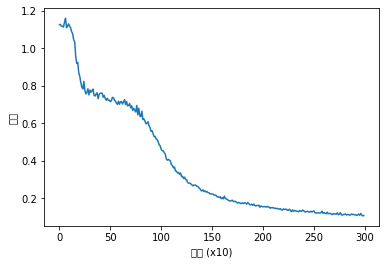

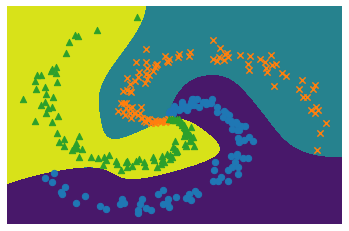

In [26]:
# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('반복 (x10)')
plt.ylabel('손실')
plt.show()

# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

### 1.4.4 Trainer 클래스

* 모델 학습시 자주 사용되므로 클래스화하여 사용

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

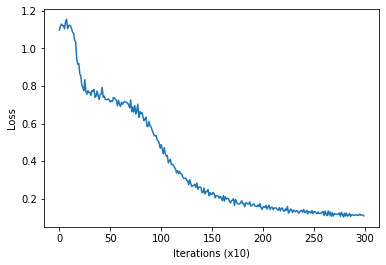

In [28]:
# ch01/train.py
%matplotlib inline
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from two_layer_net import TwoLayerNet

# 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

# 1.5 계산 고속화

###1.5.1 비트 정밀도
* 넘파이는 64비트 데이터 타입을 사용
* 그러나 신경망의 추론과 학습은 32비트를 사용해도 문제없는 경우가 대부분
* 따라서 32비트의 데이터 타입을 사용하여 데이터 전송시 발생할 수 있는 버스 대역폭 병목 현상 방지

In [ ]:
import numpy as np
a = np.random.randn(3)
print(a)
a.dtype

[ 0.5884882   0.42300529 -0.24463554]


dtype('float64')

In [ ]:
import numpy as np
a = np.random.randn(3).astype(np.float32)
print(a)
a.dtype

[0.6399222 1.2745773 1.0478756]


dtype('float32')

### 1.5.2 GPU(쿠파이)
* 딥러닝은 대량의 곱연산으로 구성된다.
* 따라서 연산을 병렬로 함께 처리하는 것이 유리한데, 이때 GPU가 CPU보다 유리하다.
* 따라서 연산 수행시, CPU가 아닌 GPU를 사용하도록 지정해준다면 계산을 고속화 할 수 있다.

In [ ]:
!pip install cupy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 8.9 MB/s 
ERROR: Operation cancelled by user


In [ ]:
import cupy as copy
x = xp.arange(6).reshape(2,3).astype('f')